In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:

train = r'C:\Users\naksh\Documents\ML opencv projectd\tomato\train'
test  = r'C:\Users\naksh\Documents\ML opencv projectd\tomato\val'

trainDIR = r'C:\Users\naksh\Documents\ML opencv projectd\tomato\train'
testDIR  = r'C:\Users\naksh\Documents\ML opencv projectd\tomato\val'


In [3]:

size = 224
batch_size = 32
epoch = 10

In [11]:

datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,validation_split=0.2)


X_train = datagen.flow_from_directory(train,
                                      target_size=(size,size),
                                      batch_size=batch_size,
                                      class_mode='categorical',
                                      subset='training')


X_test = ImageDataGenerator(rescale=1./255).flow_from_directory(test,
                                     target_size=(size,size),
                                     batch_size=batch_size,
                                     class_mode='categorical',
                                     subset='training')
                                     




Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [12]:

X_test.class_indices.keys()

dict_keys(['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'])

In [6]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

checkpoint=ModelCheckpoint(r'teatmodel.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=20,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]   

In [13]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(size,size,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(126,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 8)       

In [15]:
history = model.fit(x=X_train, 
                    validation_data=X_test,
                    epochs = epoch,
                    steps_per_epoch=X_train.samples//batch_size,
                    validation_steps=X_test.samples//batch_size,
                    callbacks=callbacks)

Epoch 1/10
2666/2666 [==============================] - ETA: 0s - loss: 2.3035 - accuracy: 0.0935
Epoch 1: val_loss improved from inf to 2.30269, saving model to teatmodel.h5
2666/2666 [==============================] - 370s 138ms/step - loss: 2.3035 - accuracy: 0.0935 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 2/10
2666/2666 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.0950
Epoch 2: val_loss did not improve from 2.30269
2666/2666 [==============================] - 364s 137ms/step - loss: 2.3034 - accuracy: 0.0950 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 3/10
2666/2666 [==============================] - ETA: 0s - loss: 2.3034 - accuracy: 0.0944
Epoch 3: val_loss improved from 2.30269 to 2.30262, saving model to teatmodel.h5
2666/2666 [==============================] - 365s 137ms/step - loss: 2.3034 - accuracy: 0.0944 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/10
2666/2666 [==============================] - ETA: 0s - loss: 2.3033 - accuracy:

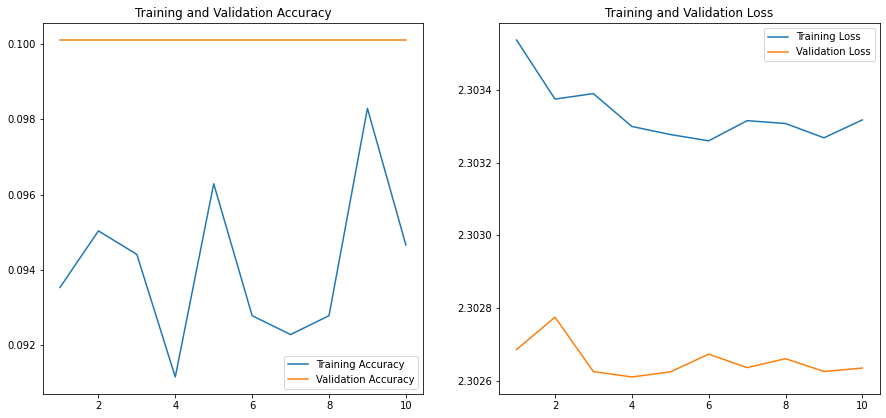

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1,11)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()